In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b70afcda121a4ecf4f973e622a2729cc


In [20]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [21]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
ushuaia ar
dikson ru
avarua ck
saint-philippe re
belushya guba ru
rikitea pf
mar del plata ar
kununurra au
fuerte olimpo py
sentyabrskiy ru
bar-le-duc fr
dombovar hu
ushuaia ar
melnikovo ru
punta arenas cl
yar-sale ru
barrow us
kaitangata nz
taoudenni ml
taolanaro mg
lebu cl
orimattila fi
orsha by
mar del plata ar
thio nc
yenagoa ng
abu samrah qa
ilulissat gl
nikolskoye ru
utiroa ki
ancud cl
barentsburg sj
vaini to
jalu ly
west wendover us
barbate es
dingle ie
airai pw
ushuaia ar
mar del plata ar
tevriz ru
arraial do cabo br
hermanus za
tiksi ru
sayyan ye
kungurtug ru
mys shmidta ru
srednekolymsk ru
cape town za
norman wells ca
cherskiy ru
mar del plata ar
san patricio mx
samusu ws
longyearbyen sj
new norfolk au
vila velha br
meadow lake ca
zhigalovo ru
tessalit ml
saint-philippe re
faanui pf
manadhoo mv
kaduqli sd
vagamo no
ambulu id
talnakh ru
tuktoyaktuk ca
victoria sc
hasaki jp
diu in
new norfolk au
torbay ca
yulara au
qaanaaq gl
bambous virieux mu
khatanga ru
luanda ao


ust-kuyga ru
airai pw
belushya guba ru
bethel us
bengkulu id
shubarshi kz
ushuaia ar
barentsburg sj
alice springs au
kavieng pg
port elizabeth za
busselton au
vaitupu wf
cape town za
geraldton au
hithadhoo mv
ushuaia ar
ban nahin la
bereda so
atasu kz
punta arenas cl
liverpool ca
hermanus za
christiana za
abu samrah qa
cahors fr
bredasdorp za
saint george bm
kapaa us
illoqqortoormiut gl
nyurba ru
smithers ca
egvekinot ru
vetluzhskiy ru
ushuaia ar
tuktoyaktuk ca
georgetown sh
ushuaia ar
barra do garcas br
hermanus za
ushuaia ar
port elizabeth za
east london za
bengkulu id
saskylakh ru
mataura pf
chumikan ru
bredasdorp za
avarua ck
rawson ar
bardiyah ly
buwenge ug
kapaa us
rikitea pf
yenagoa ng
wagar sd
ushuaia ar
thompson ca
soften dk
bluff nz
taksimo ru
gat ly
zalantun cn
saint-philippe re
busselton au
la seyne-sur-mer fr
komsomolskiy ru
harrison ph
sitka us
phalaborwa za
itapora br
broome au
rikitea pf
avila es
san juan ar
port alfred za
punta arenas cl
chateauroux fr
pisco pe
punta a

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-55.89563507970216 64.70498119310963
-88.80943968201773 41.78046615842135
-50.65045674377017 -73.28352133867439
13.48224438490999 -87.25595876717757
-49.67144733812069 -128.08500656137358
-57.34348302004367 145.68356275689035
51.45074574028362 18.82574602932877
2.13957451623844 -98.51187847269406
-44.65955387952109 -129.34597569327923
17.020564347615874 101.03789411928653
-82.23457885807548 4.519359690693648
-15.437752584045342 178.84182320618572
86.30210032813818 -96.58652077468236
-71.18000403128387 111.8653405363068
49.15607730232708 151.59601000559178
-14.982294947963624 10.386885493384426
-46.98216507359807 23.10816846280437
40.076540117841716 -133.50764072742322
29.636244690395117 -178.01818108678185
52.97231870807303 -41.62270545466319
9.931082028868516 -26.818888665592453
-7.138729159018425 162.00295051496346
-69.2052952725108 -148.1827597147597
40.39251025027764 -34.978090632864536
26.209393889565902 -146.72497941140824
-2.0270910804885602 156.54396087071234
-39.50635237620841

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [36]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | fuerte olimpo
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | bar-le-duc
Processing Record 12 of Set 1 | dombovar
Processing Record 13 of Set 1 | melnikovo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | yar-sale
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | taoudenni
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | orimattila
Processing Record 22 of Set 1 | orsha

Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | alto baudo
City not found. Skipping...
Processing Record 40 of Set 4 | marfino
Processing Record 41 of Set 4 | dolores
Processing Record 42 of Set 4 | predivinsk
Processing Record 43 of Set 4 | anchorage
Processing Record 44 of Set 4 | sorvag
City not found. Skipping...
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | porto empedocle
Processing Record 48 of Set 4 | chake chake
Processing Record 49 of Set 4 | brae
Processing Record 50 of Set 4 | methoni
Processing Record 1 of Set 5 | gubkinskiy
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | sume
Processing Record 4 of Set 5 | ardahan
Processing Record 5 of Set 5 | antofagasta
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | buraydah
Processing Record 8 of Set 5 | maltahohe
Processing Record 9 of Set 5 | derzhavinsk
Processing Recor

City not found. Skipping...
Processing Record 29 of Set 8 | belaya gora
Processing Record 30 of Set 8 | bahia blanca
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | namibe
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | sweetwater
Processing Record 35 of Set 8 | melun
Processing Record 36 of Set 8 | ilhabela
Processing Record 37 of Set 8 | bar harbor
Processing Record 38 of Set 8 | ust-kuyga
Processing Record 39 of Set 8 | shubarshi
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | ban nahin
Processing Record 43 of Set 8 | bereda
Processing Record 44 of Set 8 | atasu
Processing Record 45 of Set 8 | liverpool
Processing Record 46 of Set 8 | christiana
Processing Record 47 of Set 8 | cahors
Processing Record 48 of Set 8 | smithers
Processing Record 49 of Set 8 | egvekinot
Processing Record 50 of Set 8 | vetluzhskiy
Processing Record 1 of Set 9 | barra do garcas
Processin

City not found. Skipping...
Processing Record 20 of Set 12 | moose factory
Processing Record 21 of Set 12 | rio grande
Processing Record 22 of Set 12 | maragogi
Processing Record 23 of Set 12 | ayagoz
Processing Record 24 of Set 12 | safaga
Processing Record 25 of Set 12 | mahon
Processing Record 26 of Set 12 | sabang
Processing Record 27 of Set 12 | mamallapuram
Processing Record 28 of Set 12 | hvide sande
Processing Record 29 of Set 12 | muli
Processing Record 30 of Set 12 | freeport
Processing Record 31 of Set 12 | vatne
Processing Record 32 of Set 12 | grenaa
Processing Record 33 of Set 12 | paamiut
Processing Record 34 of Set 12 | cam ranh
Processing Record 35 of Set 12 | saskatoon
Processing Record 36 of Set 12 | nakhon phanom
Processing Record 37 of Set 12 | soto la marina
Processing Record 38 of Set 12 | chicama
Processing Record 39 of Set 12 | college
Processing Record 40 of Set 12 | iralaya
Processing Record 41 of Set 12 | padang
Processing Record 42 of Set 12 | hun
Processin

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.85,85,32,1.63,AR,2023-01-17 02:11:31
1,Dikson,73.5069,80.5464,-35.07,86,3,6.06,RU,2023-01-17 02:15:25
2,Avarua,-21.2078,-159.7750,82.45,69,75,6.91,CK,2023-01-17 02:14:32
3,Saint-Philippe,-21.3585,55.7679,73.11,81,34,12.08,RE,2023-01-17 02:15:26
4,Rikitea,-23.1203,-134.9692,77.79,68,2,5.79,PF,2023-01-17 02:15:27
5,Mar Del Plata,-38.0023,-57.5575,69.82,93,75,13.00,AR,2023-01-17 02:15:27
6,Kununurra,-15.7667,128.7333,85.98,79,40,9.22,AU,2023-01-17 02:15:28
7,Fuerte Olimpo,-21.0415,-57.8738,77.29,75,4,4.38,PY,2023-01-17 02:15:29
8,Bar-Le-Duc,48.7500,5.1667,34.18,94,44,5.99,FR,2023-01-17 02:15:30
9,Dombovar,46.3766,18.1370,41.81,94,100,5.97,HU,2023-01-17 02:15:31


In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.85,85,32,1.63,AR,2023-01-17 02:11:31
1,Dikson,73.5069,80.5464,-35.07,86,3,6.06,RU,2023-01-17 02:15:25
2,Avarua,-21.2078,-159.7750,82.45,69,75,6.91,CK,2023-01-17 02:14:32
3,Saint-Philippe,-21.3585,55.7679,73.11,81,34,12.08,RE,2023-01-17 02:15:26
4,Rikitea,-23.1203,-134.9692,77.79,68,2,5.79,PF,2023-01-17 02:15:27
5,Mar Del Plata,-38.0023,-57.5575,69.82,93,75,13.00,AR,2023-01-17 02:15:27
6,Kununurra,-15.7667,128.7333,85.98,79,40,9.22,AU,2023-01-17 02:15:28
7,Fuerte Olimpo,-21.0415,-57.8738,77.29,75,4,4.38,PY,2023-01-17 02:15:29
8,Bar-Le-Duc,48.7500,5.1667,34.18,94,44,5.99,FR,2023-01-17 02:15:30
9,Dombovar,46.3766,18.1370,41.81,94,100,5.97,HU,2023-01-17 02:15:31


In [68]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [69]:
# Adding config.py file.
config.py

NameError: name 'config' is not defined

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1673921718.1917775

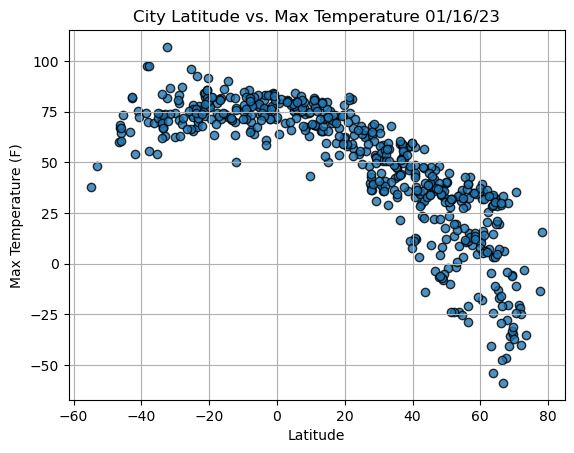

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

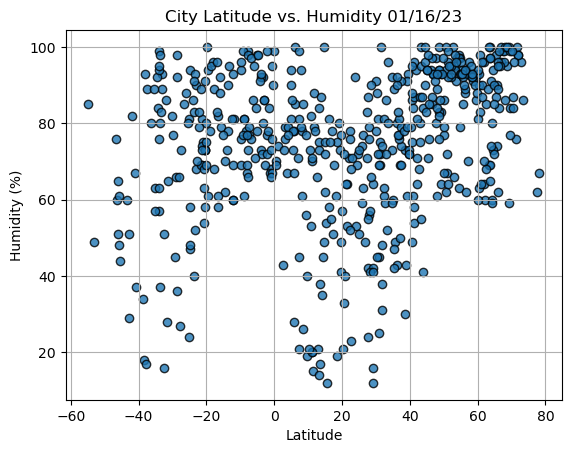

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

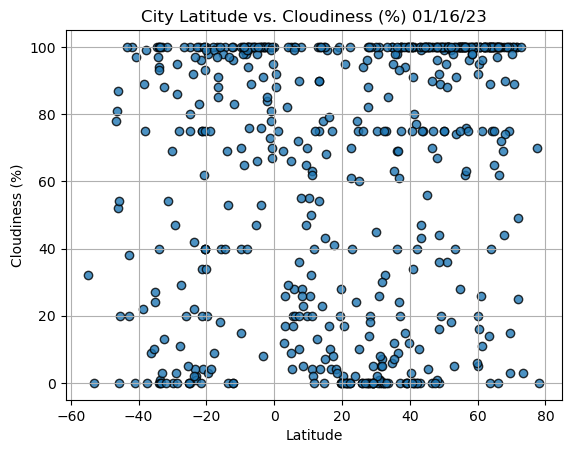

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

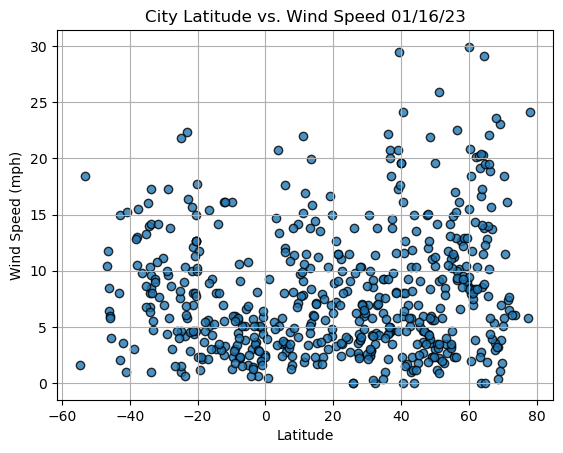

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Dikson,73.5069,80.5464,-35.07,86,3,6.06,RU,2023-01-17 02:15:25
8,Bar-Le-Duc,48.7500,5.1667,34.18,94,44,5.99,FR,2023-01-17 02:15:30
9,Dombovar,46.3766,18.1370,41.81,94,100,5.97,HU,2023-01-17 02:15:31
10,Melnikovo,56.5558,84.0850,15.26,93,100,9.13,RU,2023-01-17 02:15:32
12,Yar-Sale,66.8333,70.8333,6.28,96,100,13.73,RU,2023-01-17 02:15:32
...,...,...,...,...,...,...,...,...,...
545,College,64.8569,-147.8028,4.95,85,75,0.00,US,2023-01-17 02:28:45
546,Iralaya,15.0000,-83.2333,72.39,72,7,7.02,HN,2023-01-17 02:32:15
548,Hun,29.1268,15.9477,52.00,41,0,6.49,LY,2023-01-17 02:32:16
549,Dalvik,65.9702,-18.5286,30.13,95,100,19.51,IS,2023-01-17 02:32:17


In [58]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Dikson,73.5069,80.5464,-35.07,86,3,6.06,RU,2023-01-17 02:15:25
8,Bar-Le-Duc,48.7500,5.1667,34.18,94,44,5.99,FR,2023-01-17 02:15:30
9,Dombovar,46.3766,18.1370,41.81,94,100,5.97,HU,2023-01-17 02:15:31
10,Melnikovo,56.5558,84.0850,15.26,93,100,9.13,RU,2023-01-17 02:15:32
12,Yar-Sale,66.8333,70.8333,6.28,96,100,13.73,RU,2023-01-17 02:15:32


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

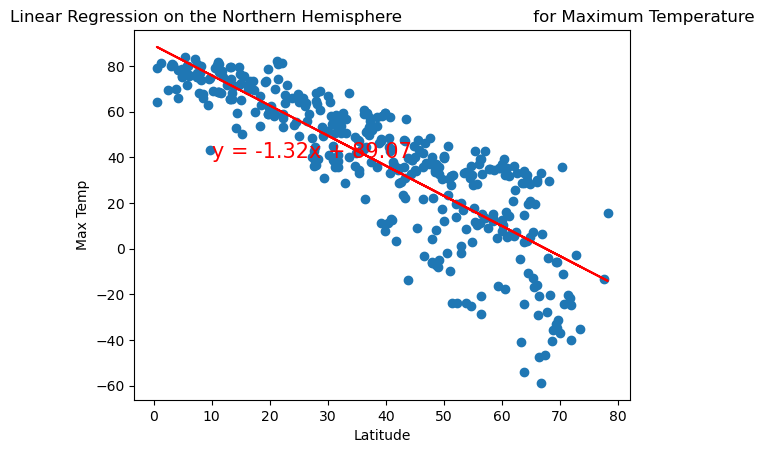

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

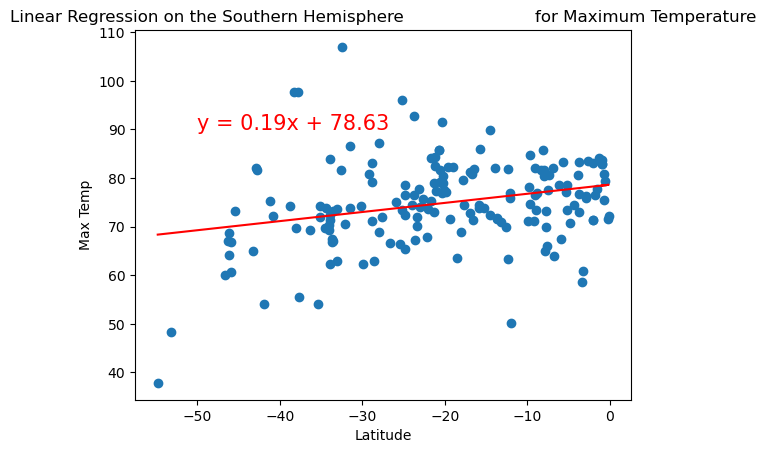

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

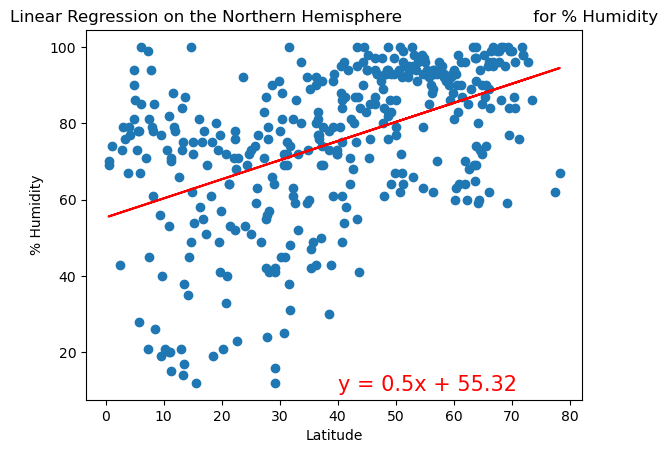

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

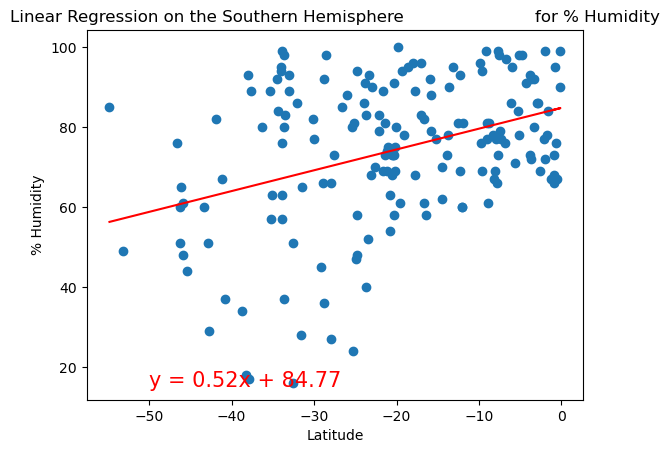

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

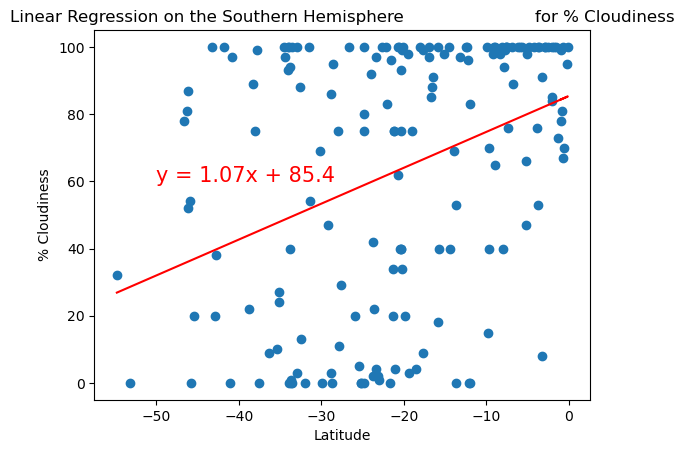

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

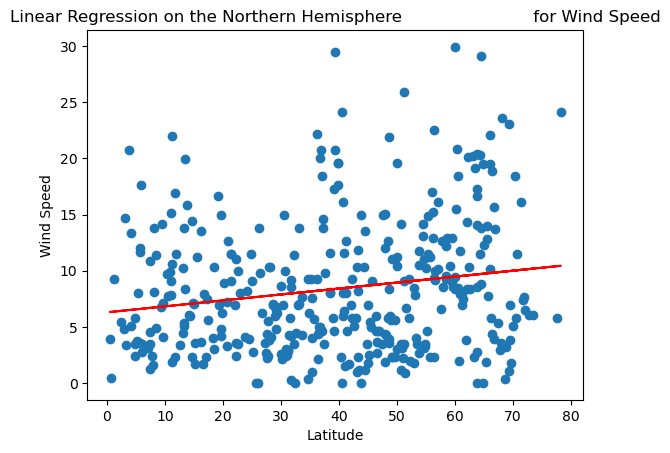

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

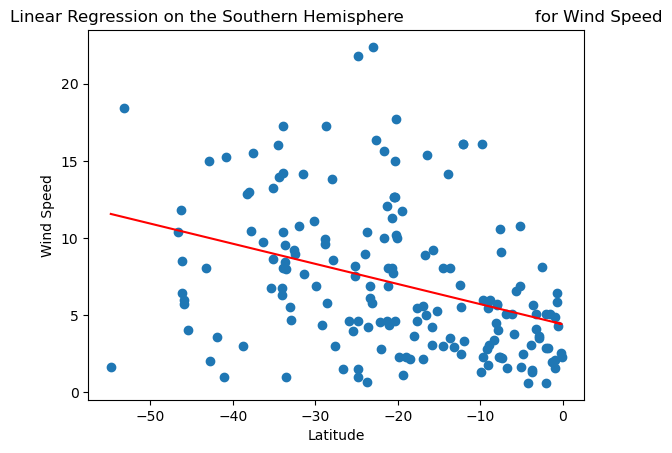

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))